In [1]:
from pymatgen.ext.matproj import MPRester
with MPRester("ZPSKgimujRNFyTRi") as m:
    
    # Structure pour material id
    structure = m.get_structure_by_material_id("mp-961687")


In [2]:
from pymatgen.electronic_structure.plotter import BSPlotter
bandstruct =m.get_bandstructure_by_material_id("mp-961687")

# Bande interdite
La bande interdite est une bande dans laquelle aucun niveau d'énergie ne peut être occupé par les électrons du cristal, c'est à dire que la densité d'état est nulle.

{'direct': False, 'energy': 0.15669999999999984, 'transition': '\\Gamma-X'}


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

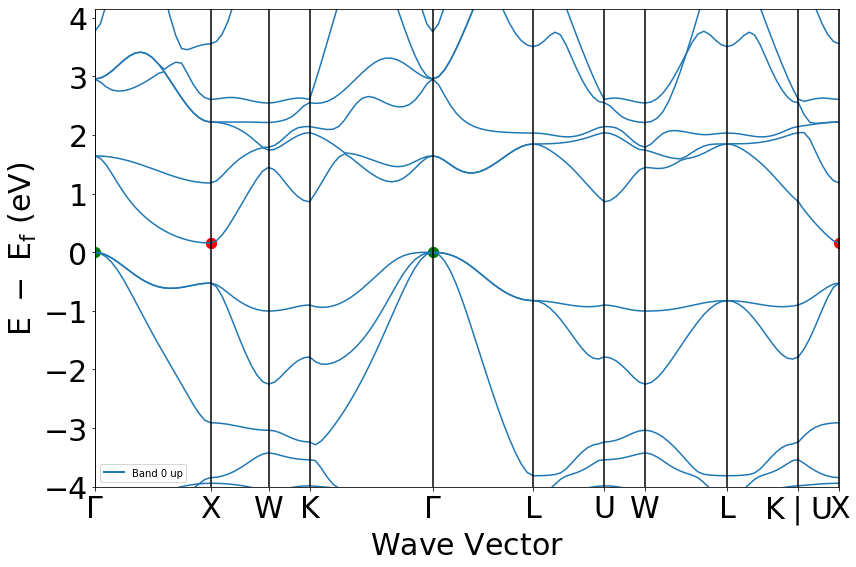

In [3]:
BI =bandstruct.get_band_gap()
print(BI)
bsplotter = BSPlotter(bandstruct)
bsplotter.get_plot(vbm_cbm_marker = True)

La bande interdite est dite indirecte, elle a comme valeur 0.1567eV (environ) et la transition se fait du kpoint Γ au kpoint X.

 # Dispersion
La dispertion est définie comme la variation d'énergie par rapport à la distance dans une certaine direction. On détermine le niveau d'énergie des différents points de la bande de valence et de conduction ainsi que la distance entre ces points pour trouver les directions où il y a le plus et le moins de dispersion.

In [4]:
import numpy as np

conduction = bandstruct.get_cbm()
valence = bandstruct.get_vbm()
print(conduction["band_index"])
print(valence["band_index"])

defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})
defaultdict(<class 'list'>, {<Spin.up: 1>: [15, 16, 17]})


La bande de valence maximale est alors la 17e alors que celle de conduction est la 18e.

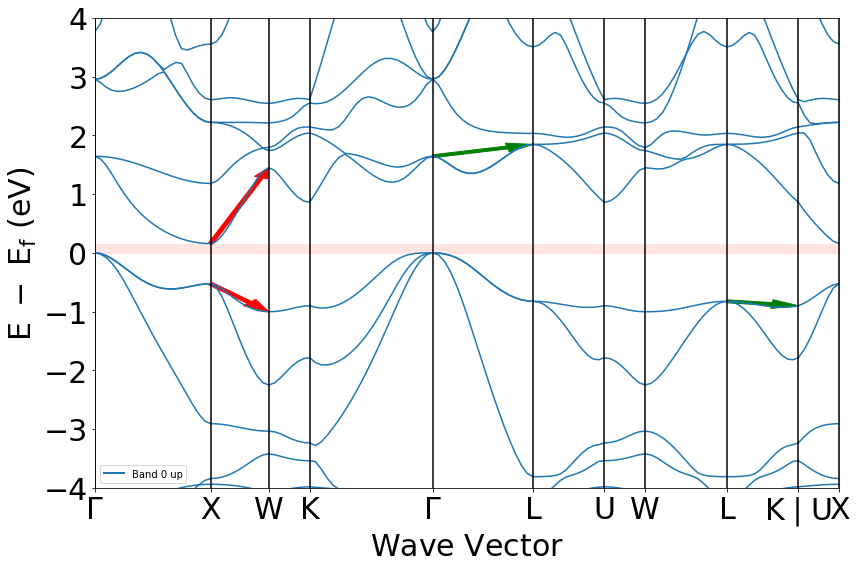

In [5]:
from pymatgen.electronic_structure.bandstructure import BandStructure
import matplotlib.pyplot as plt

data = bsplotter.bs_plot_data()

### Calcul pour la bande de valence
energy0v = np.zeros(9)
energyfv = np.zeros(9)
penteV = np.zeros(9)

distance = data.get('ticks').get('distance')
new = []
for i in range (len(distance)):
    if distance[i] not in new :
        new.append(distance[i])
        
en = data.get("energy")
for i in range(9):
    energy0v[i] = en["1"][i][17][0]
    energyfv[i] = en["1"][i][17][-1]
    penteV[i] = (energyfv[i] - energy0v[i])/(new[i+1]-new[i])
    
### Calcul pour la bande de conduction
energy0c = np.zeros(9)
energyfc = np.zeros(9)
penteC = np.zeros(9)
for i in range(9) :
    energy0c[i] = en["1"][i][18][0]
    energyfc[i] = en["1"][i][18][-1]
    penteC[i] = (energyfc[i] - energy0c[i])/(new[i+1]-new[i])

minV = min(abs(penteV)) #correspond à l'index 8
maxV = max(abs(penteV)) #correspond à l'index 1

minC = min(abs(penteC)) #correspond à l'index 4
maxC = max(abs(penteC)) #correspond à l'index 1

bsplotter.get_plot(ylim = [-4, 4])
bg = bandstruct.get_band_gap()

#conduction
plt.arrow(new[4], energy0c[4], new[5]-new[4], energyfc[4]-energy0c[4], color ='green', width = 0.05, length_includes_head = True)
plt.arrow(new[1], energy0c[1], new[2]-new[1], energyfc[1]-energy0c[1], color = 'r', width = 0.04, length_includes_head = True)

plt.arrow(new[8], energy0v[8], new[9]-new[8], energyfv[8]-energy0v[8], color = 'green', width = 0.05, length_includes_head = True)
plt.arrow(new[1], energy0v[1], new[2]-new[1], energyfv[1]-energy0v[1], color = 'r', width = 0.05, length_includes_head = True)
plt.fill_between(np.linspace(data['ticks']['distance'][0], data['ticks']['distance'][-1], 500), 0, bg['energy'], color = 'mistyrose')



# Masse effective



In [6]:
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)

#Masse effective de la bande de conduction :
a = (energy0c[2])/(new[2]-new[1])**2
d2E =  2*a*(A**(2))*eV
print("Equation de la parabole : f(k) =", a, "(k-", distance[7], ")²")
print("dérivée seconde f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2] \n Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print(" m* =", hbar**2/d2E)  

#Masse effective de la bande de valence :
a = (energy0v[2])/(new[2]-new[1])**2
d2E =  2*a*(A**(2))*eV
print("Equation de la parabole : f(k) =", a, "(k-", distance[7], ")²")
print("dérivée seconde f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2] \n Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print(" m* =", hbar**2/d2E)  

Equation de la parabole : f(k) = 6.018239149071419 (k- 2.8586167698693465 )²
dérivée seconde f''(k) = 12.036478298142837 [eV.A^2]  = 1.9284563430342582e-38 [J.m^2] 
 Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))
 m* = 5.766901197099429e-31
Equation de la parabole : f(k) = -4.17248506867651 (k- 2.8586167698693465 )²
dérivée seconde f''(k) = -8.34497013735302 [eV.A^2]  = -1.33701155730019e-38 [J.m^2] 
 Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))
 m* = -8.317966387407433e-31


La masse effective est calculée à l'aide de la dispersion parabolique, pour se faire nous avons besoin du point maximum et d'un autre point quelconque, en utilisant la formule de la masse effective nous avon déterminé : 
* Pour la bande de conduction : m* = 5.766901197099429e-31 [kg]
* Pour la bande de valence : m* = -8.317966387407433e-31 [kg]